In [10]:
  import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [11]:
#Import Dataset

Dataset = pd.read_csv("sample_data/diamonds.csv")

Dataset.head(10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [12]:
Dataset.shape
Dataset.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
Dataset["Volume"] = Dataset["x"]*Dataset["y"]*Dataset["z"]
Dataset.describe()

,carat,depth,table,price,x,y,z,Volume
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,129.849403
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,78.245262
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,65.136830
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,114.808572
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,170.842451
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,3840.598060


In [14]:
Dataset = Dataset[(Dataset['Volume'] < 750) & (Dataset['Volume'] > 0)]

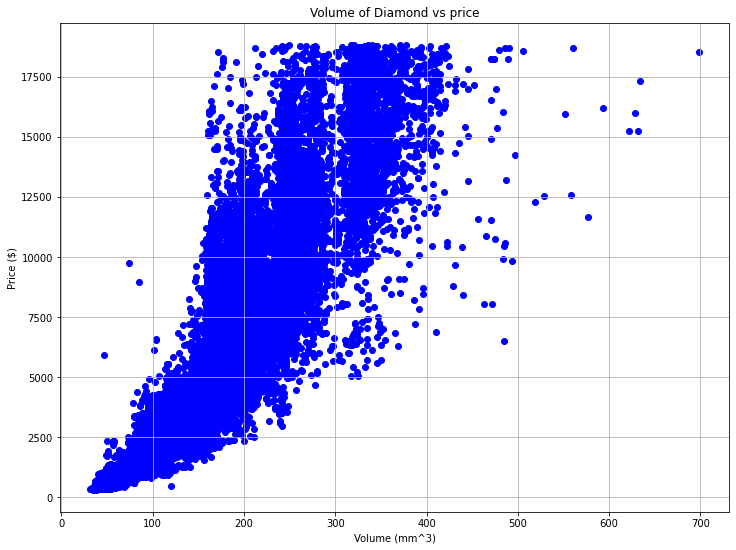

In [15]:
#Scatter graph

xData = Dataset["Volume"]
yData = Dataset["price"]
category = Dataset['cut']

fig = plt.figure(figsize = (12,9))
plt.scatter(xData, yData, color = "b")
plt.title("Volume of Diamond vs price")
plt.ylabel("Price ($)")
plt.xlabel("Volume (mm^3)")
plt.grid()
plt.show()

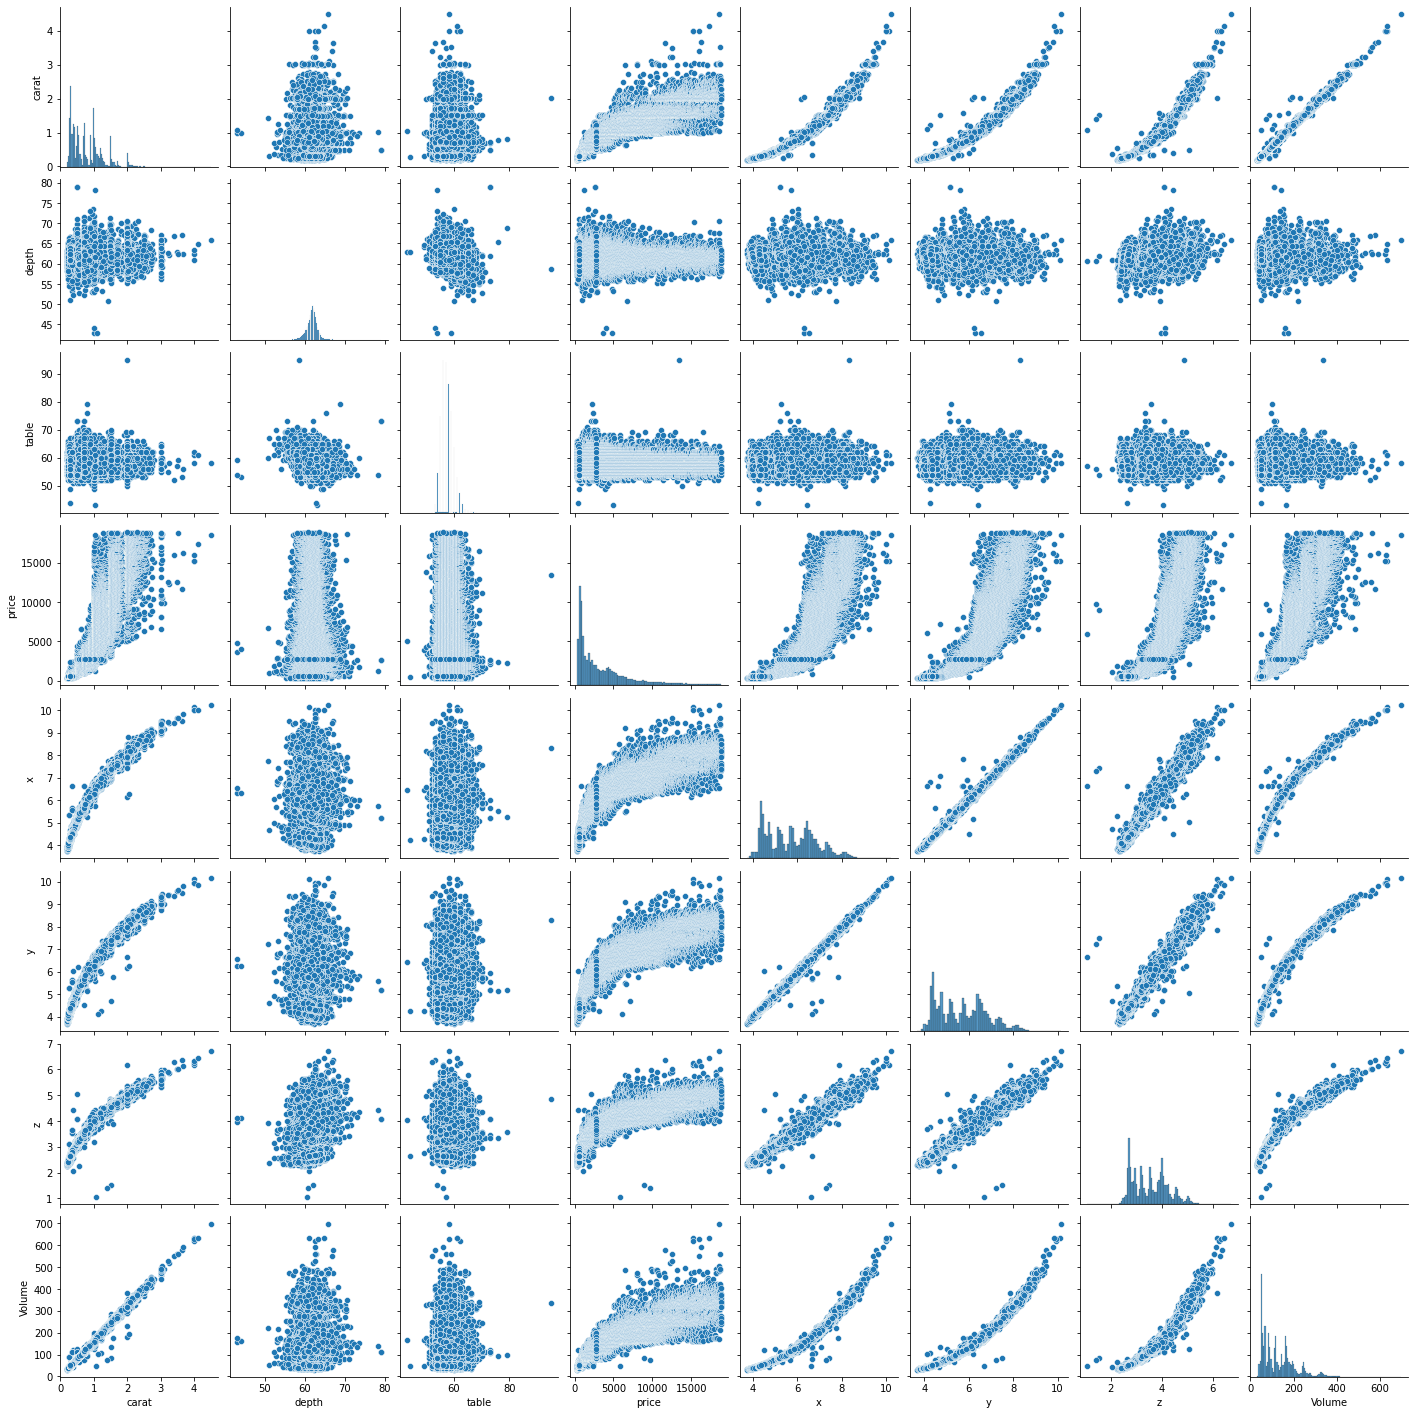

In [16]:
sns.pairplot(Dataset)

In [17]:
#Find catagorical varibles and encode

s = (Dataset.dtypes =="object")
object_cols = list(s[s].index)
print("Catagorical varibles:")
print(object_cols)
Ordinal_Encoder = OrdinalEncoder()
Dataset[object_cols] = Ordinal_Encoder.fit_transform(Dataset[object_cols])

#PreProssesing

y = Dataset.price

X = Dataset.drop(["price", "x", "y", "z"], axis=1)

X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)

#Fit model (XGBoost)

XG = XGBRegressor(n_estimators = 500, learning_rate = 0.1)
XGmodel = XG.fit(X_train, y_train, early_stopping_rounds = 5, eval_set = [(X_test, y_test)], verbose = False)
predictions = XGmodel.predict(X_test) 

#Erros

MAE = mean_absolute_error(predictions, y_test)
MSE = mean_squared_error(predictions, y_test)
RMSE = np.sqrt(MSE)
print("Mean absolute error =", MAE)
print("Mean squred error =", MSE)
print("Root mean squred error =", RMSE)


Catagorical varibles:
['cut', 'color', 'clarity']


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


Mean absolute error = 273.9101568725767
Mean squred error = 272378.7971061868
Root mean squred error = 521.899221216306


In [18]:
#Random Forest
RF = RandomForestRegressor(max_depth = 50,random_state = 1)
RF_Model = RF.fit(X_train,y_train)
RF_predictions = RF_Model.predict(X_test)

#Errors
MAE = mean_absolute_error(RF_predictions, y_test)
MSE = mean_squared_error(RF_predictions, y_test)
RMSE = np.sqrt(MSE)
print("Mean absolute error =", MAE)
print("Mean squred error =", MSE)
print("Root mean squred error =", RMSE)

Mean absolute error = 276.91420904402895
Mean squred error = 299070.60334586684
Root mean squred error = 546.8734801998236


In [19]:
Dataset.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z,Volume
count,53916.000000,53916.000000,53916.000000,53916.000000,53916.000000,53916.000000,53916.000000,53916.000000,53916.000000,53916.000000,53916.000000
mean,0.797609,2.553101,2.593998,3.835522,61.749496,57.456911,3930.649195,5.731512,5.733339,3.539345,129.790212
std,0.473434,1.027661,1.701234,1.724530,1.432241,2.234080,3986.790383,1.119205,1.111089,0.691468,76.398150
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,31.707984
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,65.188530
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,114.840180
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5322.250000,6.540000,6.540000,4.040000,170.844468
max,4.500000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.230000,10.160000,6.720000,698.455296


In [20]:
X_test

,carat,cut,color,clarity,depth,table,Volume
36628,0.29,4.0,4.0,6.0,62.0,55.0,47.796672
43955,0.31,1.0,2.0,2.0,63.1,57.0,49.990828
6686,0.97,3.0,3.0,3.0,61.3,57.0,156.605176
52101,0.69,2.0,2.0,2.0,61.3,55.0,115.243128
35152,0.40,2.0,0.0,5.0,61.7,57.0,65.466400
...,...,...,...,...,...,...,...
2013,0.81,4.0,4.0,4.0,63.6,57.0,129.527420
11884,0.87,2.0,1.0,2.0,61.5,57.0,141.895260
9026,1.05,4.0,3.0,3.0,62.6,62.0,169.535025
10475,1.00,3.0,4.0,5.0,63.0,59.0,163.880124


In [21]:
RF_Model.predict(X_test[:10])

array([  562.53      ,   534.28333333,  4004.15333333,  2381.26416667,
        1045.60516667,  5899.26033333,  4007.82333333,  5294.76      ,
        4807.34      , 10340.59      ])

In [22]:
y_test[:10]

36628      478
43955      516
6686      4101
52101     2459
35152      890
15161     6095
5764      3897
11894     5116
11559     5034
24261    12483
Name: price, dtype: int64